## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) ) 


In [10]:
# link necessary libraries
library(tidyverse)
library(corrplot)

# settings for plot visualisation
options(repr.plot.height = 5, repr.plot.res = 200)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



Načítanie datasetu - dataset viete funkciami dostupnými v R stiahnuť a rozbaliť aj z formátu ZIP

In [2]:
# URL of the dataset
dataset_url <- "https://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip"

# create temporary destination file path with .zip extension
dest_file <- tempfile(fileext = ".zip")

# download the dataset, mode = write binary
download.file(dataset_url, destfile = dest_file, mode = "wb")

# unzip the file into chosen location (enter directory)
unzip(dest_file, exdir = "data_1") # TODO fill in

### Úloha 1 (1b)

Načítajte dataset do premennej `data_hw`.

In [15]:
dest_file = "D:/UNIZA/ING/LETNY PRVAK/SSBU/SSBU/t3_cv2/data_1/heart_failure_clinical_records_dataset.csv"
data_hw <- read.csv(dest_file)


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
75,0,582,0,20,1,265000,1.90,130,1,0,4,1
55,0,7861,0,38,0,263358,1.10,136,1,0,6,1
65,0,146,0,20,0,162000,1.30,129,1,1,7,1
50,1,111,0,20,0,210000,1.90,137,1,0,7,1
65,1,160,1,20,0,327000,2.70,116,0,0,8,1
90,1,47,0,40,1,204000,2.10,132,1,1,8,1
75,1,246,0,15,0,127000,1.20,137,1,0,10,1
60,1,315,1,60,0,454000,1.10,131,1,1,10,1
65,0,157,0,65,0,263358,1.50,138,0,0,10,1


   **Obsahuje dataset chýbajúce hodnoty (NA) ?** 
   - na základe výsledkov summary dataset neobsahuje NA hodnoty

In [4]:
summary(data_hw)


      age           anaemia       creatinine_phosphokinase    diabetes     
 Min.   :40.00   Min.   :0.0000   Min.   :  23.0           Min.   :0.0000  
 1st Qu.:51.00   1st Qu.:0.0000   1st Qu.: 116.5           1st Qu.:0.0000  
 Median :60.00   Median :0.0000   Median : 250.0           Median :0.0000  
 Mean   :60.83   Mean   :0.4314   Mean   : 581.8           Mean   :0.4181  
 3rd Qu.:70.00   3rd Qu.:1.0000   3rd Qu.: 582.0           3rd Qu.:1.0000  
 Max.   :95.00   Max.   :1.0000   Max.   :7861.0           Max.   :1.0000  
 ejection_fraction high_blood_pressure   platelets      serum_creatinine
 Min.   :14.00     Min.   :0.0000      Min.   : 25100   Min.   :0.500   
 1st Qu.:30.00     1st Qu.:0.0000      1st Qu.:212500   1st Qu.:0.900   
 Median :38.00     Median :0.0000      Median :262000   Median :1.100   
 Mean   :38.08     Mean   :0.3512      Mean   :263358   Mean   :1.394   
 3rd Qu.:45.00     3rd Qu.:1.0000      3rd Qu.:303500   3rd Qu.:1.400   
 Max.   :80.00     Max.   :1.0

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)
- age - numerická 
- anaemia - kategorická
- high_blood_pressure - kategorická
- serum_sodium - numerická
- death_event - kategorická

In [20]:
class(data_hw$age)
unique(data_hw$age)
class(data_hw$anaemia)
unique(data_hw$anaemia)
class(data_hw$high_blood_pressure)
unique(data_hw$high_blood_pressure)
class(data_hw$serum_sodium)
unique(data_hw$serum_sodium)
class(data_hw$DEATH_EVENT)
unique(data_hw$DEATH_EVENT)




[1] "numeric"

[1] 75.000 55.000 65.000 50.000 90.000 60.000 80.000 62.000 45.000 49.000
[11] 82.000 87.000 70.000 48.000 68.000 53.000 95.000 58.000 94.000 85.000
[21] 69.000 72.000 51.000 57.000 42.000 41.000 67.000 79.000 59.000 44.000
[31] 63.000 86.000 66.000 43.000 46.000 61.000 81.000 52.000 64.000 40.000
[41] 60.667 73.000 77.000 78.000 54.000 47.000 56.000

[1] "integer"

[1] 0 1

[1] "integer"

[1] 1 0

[1] "integer"

[1] 130 136 129 137 116 132 131 138 133 140 127 121 135 134 144 128 145 142 139
[20] 146 141 143 126 124 113 125 148

[1] "integer"

[1] 1 0

**Obsahuje dataset duplicitné záznamy?**

 po použití metódy distinct sa počet dát nezmenil, čiže neobsahuje duplicitné záznamy ( 299 × 13)
 

In [12]:
data_clean <- data_hw %>%
    distinct()

data_clean

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
75,0,582,0,20,1,265000,1.90,130,1,0,4,1
55,0,7861,0,38,0,263358,1.10,136,1,0,6,1
65,0,146,0,20,0,162000,1.30,129,1,1,7,1
50,1,111,0,20,0,210000,1.90,137,1,0,7,1
65,1,160,1,20,0,327000,2.70,116,0,0,8,1
90,1,47,0,40,1,204000,2.10,132,1,1,8,1
75,1,246,0,15,0,127000,1.20,137,1,0,10,1
60,1,315,1,60,0,454000,1.10,131,1,1,10,1
65,0,157,0,65,0,263358,1.50,138,0,0,10,1


### Úloha 2 (1b)

Skúmajte premennú 'sex' (pohlavie). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž) 

In [28]:
summary(data_hw$sex)
unique(data_hw$sex)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.6488  1.0000  1.0000 

[1] 1 0

**Koľko záznamov mužov a žien obsahuje dataset?**
počet žien: 105
počet mužov 194

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)** 
počet žien: 101 počet mužov 102

In [24]:
pocet_zien_nefajciar <- sum(data_hw$sex == 0 & data_hw$smoking == 0)
pocet_muzov_nefajciar <- sum(data_hw$sex == 1 & data_hw$smoking == 0)
pocet_zien_nefajciar
pocet_muzov_nefajciar

[1] 101

[1] 102

### Úloha 3 (1b)

Popíšte premennú 'age' (vek).

In [27]:
summary(data_hw$age)
unique(data_hw$age)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   51.00   60.00   60.83   70.00   95.00 

[1] 75.000 55.000 65.000 50.000 90.000 60.000 80.000 62.000 45.000 49.000
[11] 82.000 87.000 70.000 48.000 68.000 53.000 95.000 58.000 94.000 85.000
[21] 69.000 72.000 51.000 57.000 42.000 41.000 67.000 79.000 59.000 44.000
[31] 63.000 86.000 66.000 43.000 46.000 61.000 81.000 52.000 64.000 40.000
[41] 60.667 73.000 77.000 78.000 54.000 47.000 56.000

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**
min_vek: 40,
max_vek: 95,
priemerny: 60.834

In [32]:
min_vek <- min(data_hw$age)
max_vek <- max(data_hw$age)
priemerny_vek <- mean(data_hw$age)
min_vek
max_vek
priemerny_vek

[1] 40

[1] 95

[1] 60.83389

**Z akého veku je v datasete najviac záznamov?** z veku 60r

In [37]:
max_zaznamov_vek <- which.max(table(data_hw$age))
max_zaznamov_vek

60 
21

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

- pre vytvorenie premennej použite funkciu ifelse - https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/ifelse

In [40]:
data_hw$risk <- ifelse(data_hw$age > 50 & data_hw$serum_creatinine > 1.2, 'High', 'Low')

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

- počet stĺpcov (atribút 'breaks') môže mať predvolenú hodnotu, nemusíte ho špecifikovať

- funkcia hist - https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/hist

(hint: použite funkciu filter na záznamy, kde 'risk' == 'High', a v histograme ako dáta vložte hodnoty z premennej 'age')

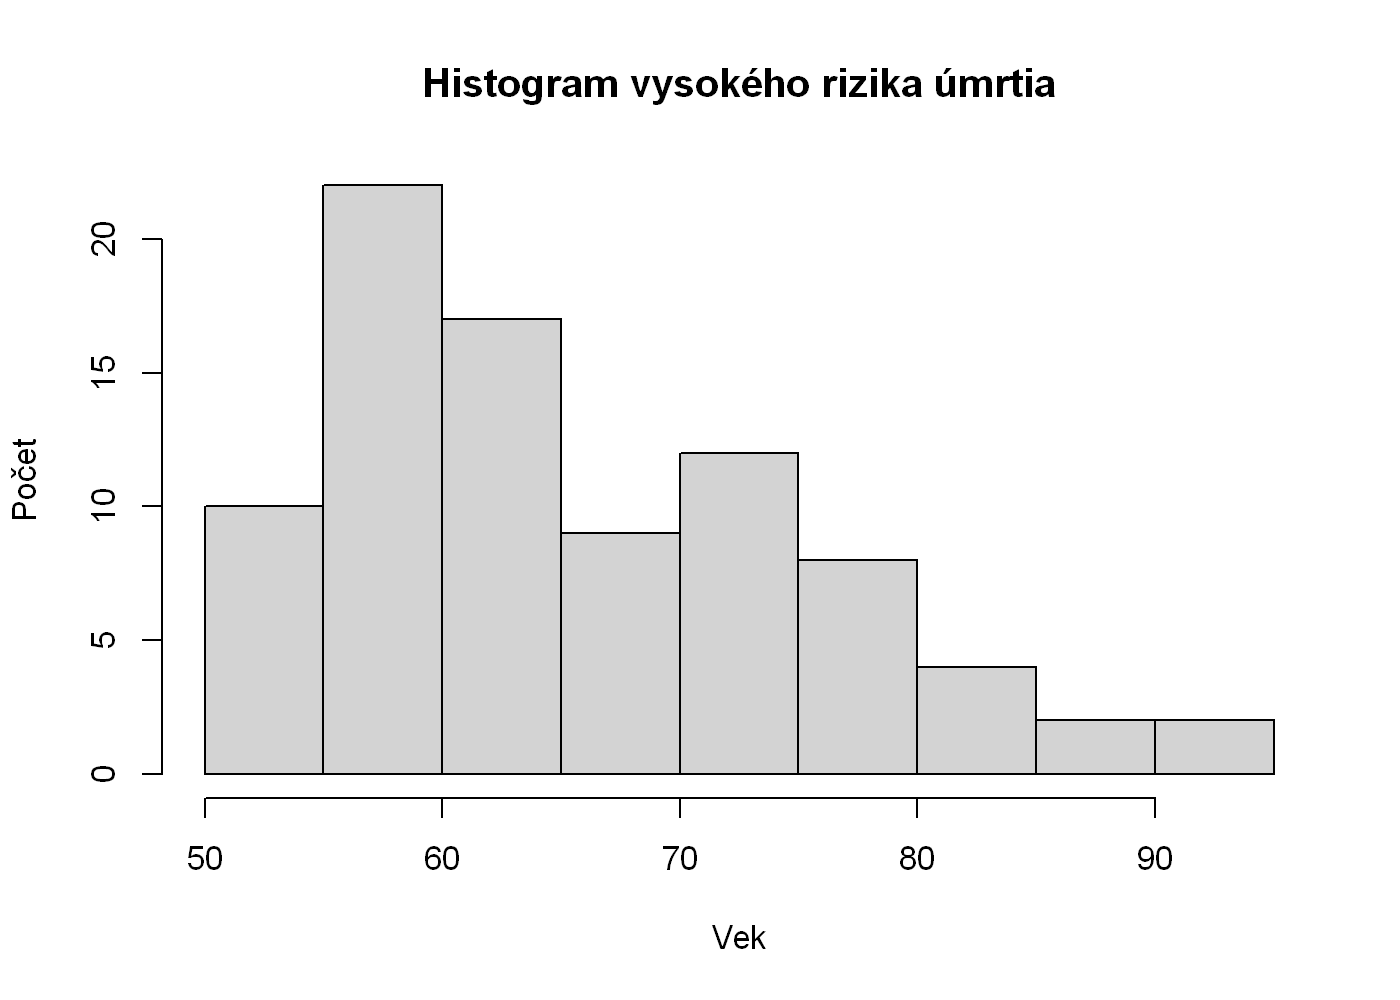

In [54]:
filtered <- data_hw %>% 
    filter(risk == 'High')
hist(filtered$age, xlab = "Vek", ylab = "Počet", main = "Histogram vysokého rizika úmrtia")


**V akom veku je riziko zlyhania srdca najväčšie?**

In [67]:
vek_max_riziko <- which.max(table(data_hw$age[data_hw$risk == 'High']))
vek_max_riziko


    51     52     53     54     55     56     58     59     60 60.667     61 
     1      1      3      2      3      1      2      1     18      1      1 
    63     64     65     68     69     70     72     73     75     77     78 
     2      2     11      1      1      7      4      2      6      1      1 
    79     80     82     85     86     90     94     95 
     1      5      1      3      1      1      1      1 

60 
 9

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

- korelácia sa dá analyzovať iba na numerických premenných, preto musíte dátový typ premennej zmeniť na kategorický a ten uložiť vo formáte 'integer' alebo 'numeric'.


In [ ]:
# TODO

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure